In [1]:
import steady_state_analysis as ssa
import numpy as np
import pandas as pd
from functools import reduce
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import matplotlib
import tkinter as tk
import tkinter.filedialog as tkdia
import seaborn as sns    
from scipy import stats
from scipy.stats import wilcoxon
plt.style.use('default')
matplotlib.rcParams['font.sans-serif'] = 'Arial'

In [5]:
def summarize_clones(all_data_df):
    
    date = all_data_df.expt_date[0]
    clone_report = open(f"{date}_clone_report.txt", "w")
    
    for plasmid in all_data_df.plasmid.unique():

        df_gen = all_data_df[all_data_df.plasmid == plasmid]
        print(f"{plasmid}")
        clone_report.write(f"{plasmid}")

        for genotype in df_gen.genotype.unique():
            print(genotype)
            clone_report.write(f"\n{genotype}")
            df_genotype = df_gen[df_gen.genotype == genotype]

            for clone in df_genotype.clone.unique():
                df = df_genotype[df_genotype.clone == clone]

                median_gfp_norm = df.gfp_norm.median()
                print(f"""
    Clone {clone} 
    GFP norm = {median_gfp_norm}
    """)
                
                clone_report.write(f"""
    Clone {clone} 
    GFP norm = {median_gfp_norm}

""")

In [6]:
# Read in the data
master_df = pd.read_csv(ssa.select_file()) # have the user select the master index for their steady state expt.
all_dfs_list = ssa.set_steady_state_dfs_list(master_df, 4)

all_data_df = pd.concat(all_dfs_list, sort=False, ignore_index=True)
all_data_df = all_data_df.set_index(['plasmid', 'cell_index'], drop=False)

In [7]:
# Process the data (add normalization, ratios, weights etc.)

gfp_bg = all_data_df.loc['no-plasmid', 'gfp_mean'].median()
all_data_df.loc[:, 'gfp_norm'] = all_data_df.gfp_mean/gfp_bg
all_data_df = ssa.set_proportional_weights_by_plasmid(all_data_df)

ABF1-gfp
Number of cells in ABF1-gfp group = 271
Fraction of all cell in ABF1-gfp = 0.15610599078341014
weight=6.405904059040591
Cdc48-gfp
Number of cells in Cdc48-gfp group = 341
Fraction of all cell in Cdc48-gfp = 0.19642857142857142
weight=5.090909090909091
Msn2-gfp
Number of cells in Msn2-gfp group = 436
Fraction of all cell in Msn2-gfp = 0.2511520737327189
weight=3.9816513761467887
no-plasmid
Number of cells in no-plasmid group = 152
Fraction of all cell in no-plasmid = 0.08755760368663594
weight=11.421052631578949
rpt5-gfp
Number of cells in rpt5-gfp group = 536
Fraction of all cell in rpt5-gfp = 0.3087557603686636
weight=3.238805970149254


C:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Miniconda3\lib\site-packages\IPython\core\interactiveshell.py:2819: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
C:\ProgramData\Miniconda3\lib\site-packages\IPython\core\interactiveshell.py:2845: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)


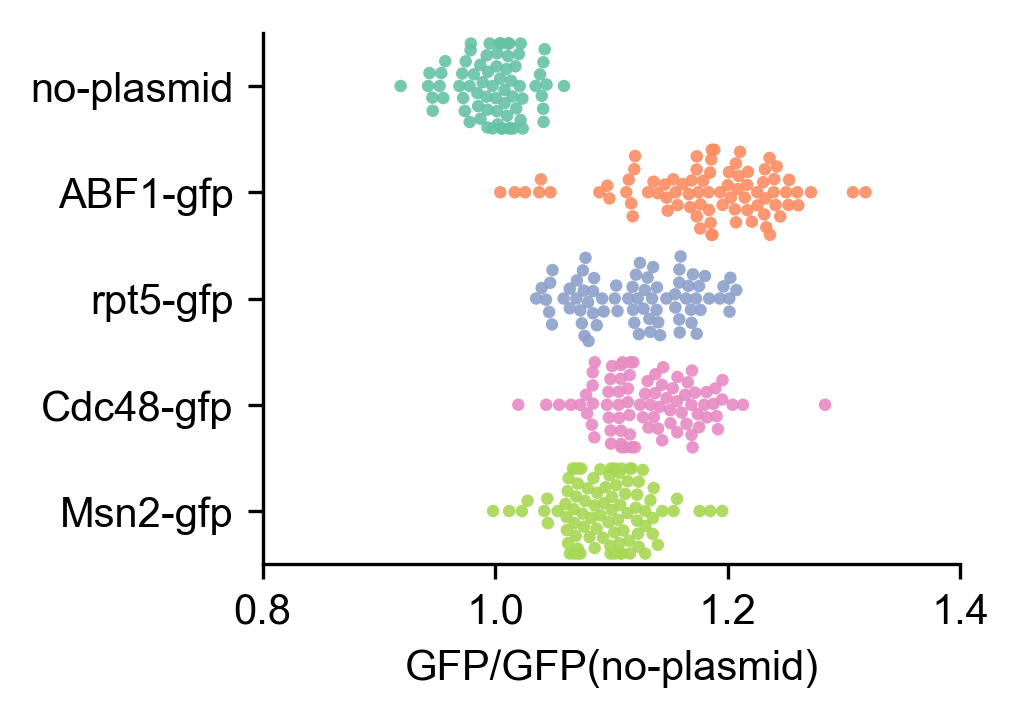

In [8]:
df = all_data_df.sample(400, weights=all_data_df.weight)
order = ['no-plasmid', 'ABF1-gfp', 'rpt5-gfp', 'Cdc48-gfp', 'Msn2-gfp']

fig = plt.figure(figsize=(3, 2.3))
fig.set_dpi(300)

y_var = 'gfp_norm'
ax = sns.swarmplot(y='plasmid', x=y_var, data=df,
                 dodge=True, palette='Set2', order=order,
                 orient='h', size=3, alpha=0.9)
sns.despine()
ax.set_ylabel('')
ax.set_xlabel('GFP/GFP(no-plasmid)')
ax.set_xlim(0.8, 1.4)

plt.show()